In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from fuzzywuzzy import fuzz
from tqdm import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('../transfers1.6.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,ID,to_club_name,to_league_name,player_name,age,position,from_club_involved_name,fee_cleaned,year,grouping_positions_1,grouping_positions_2,normalized_from_club_name,from_league,to_club_tier,from_club_tier,age_grouping_1,age_grouping_2
0,0,0,3813,Hertha BSC,1 Bundesliga,Lukas Klünter,22,Right Back,1. FC Köln,1.80,2018,RB,B,1. FC Köln,1 Bundesliga,Tier_3,Tier_3,U25,Under23
1,1,1,4461,Dinamo Moscow,Premier Liga,Konstantin Rausch,27,Left Back,1. FC Köln,1.35,2017,LB,B,1. FC Köln,1 Bundesliga,Tier_2,Tier_3,U30,Under30
2,2,2,4597,Fulham FC,Premier League,Sascha Riether,30,Right Back,1. FC Köln,1.26,2013,RB,B,1. FC Köln,1 Bundesliga,Tier_2,Tier_3,U30,Under30
3,3,3,1819,Tottenham Hotspur,Premier League,Kevin Wimmer,22,Centre Back,1. FC Köln,5.40,2015,CB,D,1. FC Köln,1 Bundesliga,Tier_1,Tier_3,U25,Under23
4,4,4,3018,TSG 1899 Hoffenheim,1 Bundesliga,Kevin Vogt,24,Centre Back,1. FC Köln,2.70,2016,CB,D,1. FC Köln,1 Bundesliga,Tier_2,Tier_3,U25,Under30


In [6]:
df.fee_cleaned.value_counts()

0.900     322
1.800     306
1.350     295
2.700     259
0.450     246
         ... 
1.640       1
1.950       1
21.690      1
8.150       1
0.513       1
Name: fee_cleaned, Length: 590, dtype: int64

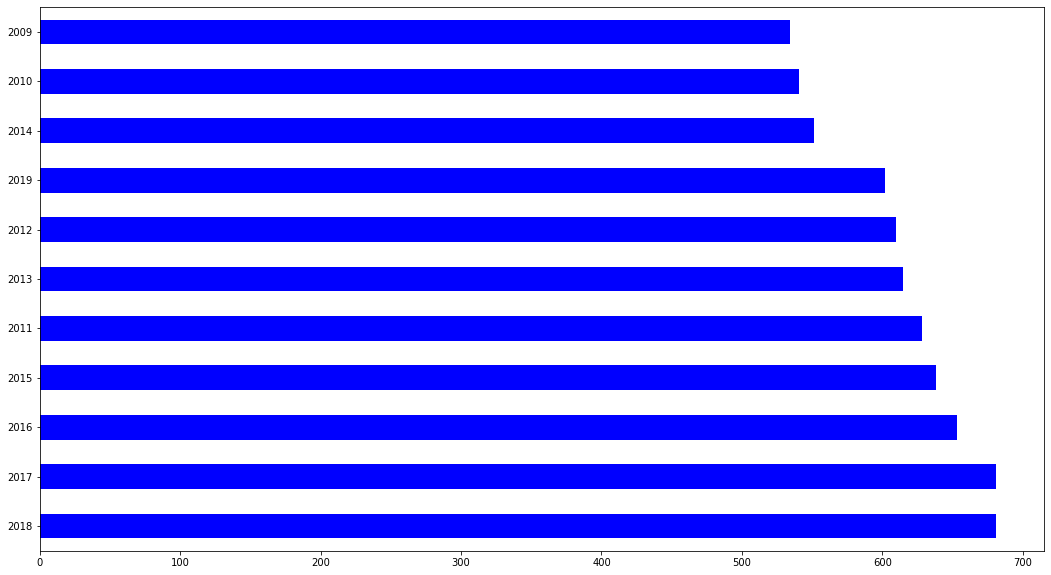

In [8]:
fig, ax = plt.subplots(figsize=(18,10))
df.year.value_counts().plot(kind = "barh", color = 'blue')

#####  The above graph shows an increasing number of transfers over the years

In [9]:
millions_per_year = df.groupby('year')['fee_cleaned'].sum()
millions_per_year = pd.DataFrame(millions_per_year)
millions_per_year = millions_per_year.sort_values(by=['fee_cleaned'], ascending=False)
millions_per_year = millions_per_year.reset_index()
millions_per_year.head(20)

,year,fee_cleaned
0,2019,5244.731
1,2017,5167.189
2,2018,4802.096
3,2016,3877.526
4,2015,3349.361
5,2013,2754.470
6,2014,2637.639
7,2012,2176.093
8,2011,2156.065
9,2009,2129.270


##### Transfer Price grouping

Grouping 1
 
 - Above80M : transfers above 80M
 - 80Mto40M : transfers between 40M to 80M
 - 40Mto10M : transfers between 10M to 40M
 - 10Mto1M : transfers between 1M and 10M
 - Below1M : transfers below 1M
 
Grouping 2

 - Above60M: transfers worth 60M+ 
 - 60Mto20M : transfers between 20M to 60M
 - 20Mto5M : transfers between 5M to 20M
 - Below5M : transfers below 5M
 

In [13]:
df['transfer_price_group1'] = 0
for i in range(len(df)):
    if(df.fee_cleaned[i] >= 80):
        df['transfer_price_group1'][i] = 'Above80M'
    
    elif((80 > df.fee_cleaned[i]) and (40 <= df.fee_cleaned[i])):
        df['transfer_price_group1'][i] = '80Mto40M'
        
    elif((40 > df.fee_cleaned[i]) and (10 <= df.fee_cleaned[i])):
        df['transfer_price_group1'][i] = '40Mto10M'
    
    elif((10 > df.fee_cleaned[i]) and (1 <= df.fee_cleaned[i])):
        df['transfer_price_group1'][i] = '10Mto1M'
      
    else:
        df['transfer_price_group1'][i] = 'Below1M'

df['transfer_price_group1'].value_counts()

10Mto1M     3872
Below1M     1907
40Mto10M     884
80Mto40M      59
Above80M      12
Name: transfer_price_group1, dtype: int64

In [15]:
df['transfer_price_group2'] = 0
for i in range(len(df)):
    if(df.fee_cleaned[i] >= 60):
        df['transfer_price_group2'][i] = 'Above60M'
    
    elif((60 > df.fee_cleaned[i]) and (20 <= df.fee_cleaned[i])):
        df['transfer_price_group2'][i] = '60Mto20M'
        
    elif((20 > df.fee_cleaned[i]) and (5 <= df.fee_cleaned[i])):
        df['transfer_price_group2'][i] = '20Mto5M'
      
    else:
        df['transfer_price_group2'][i] = 'Below5M'

df['transfer_price_group2'].value_counts()

Below5M     4793
20Mto5M     1599
60Mto20M     312
Above60M      30
Name: transfer_price_group2, dtype: int64

In [ ]:
df = df.rename(columns = {'fee_cleaned':'transfer_price'})